# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female']

In [5]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Middle Class']

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,164.375846,45.775115,47.653525,21084.288806
1,Female,Middle Class,139.366917,78.486886,4.342285,18289.969691
2,Female,Rich,139.939107,89.469856,27.118533,18744.858525
3,Female,Poor,188.083644,52.662991,40.671579,20906.796600
4,Female,Middle Class,210.951541,75.948682,22.653866,19727.406104


## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  1,   2,   3,   4,   5,   6,   8,   9,  12,  14,
             ...
             474, 479, 480, 482, 484, 485, 486, 487, 488, 489],
            dtype='int64', length=246),
 'Male': Int64Index([  0,   7,  10,  11,  13,  17,  18,  19,  20,  21,
             ...
             490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
            dtype='int64', length=254)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  139.366917  78.486886   4.342285  18289.969691
2    Female            Rich  139.939107  89.469856  27.118533  18744.858525
3    Female            Poor  188.083644  52.662991  40.671579  20906.796600
4    Female    Middle Class  210.951541  75.948682  22.653866  19727.406104
5    Female    Middle Class  172.306517  96.347445  37.032689  21272.737487
..      ...             ...         ...        ...        ...           ...
485  Female            Poor  130.404839  59.729268  26.965606  18036.396845
486  Female    Middle Class  174.512504  94.465148  34.077336  18040.858955
487  Female            Poor  167.663678  89.461056  31.688316  18438.287177
488  Female    Middle Class  172.411864  74.568377  34.613811  19194.545604
489  Female            Poor  179.374200  62.398798  28.320208  18828.201810

[246 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,139.366917,78.486886,4.342285,18289.969691
2,Female,Rich,139.939107,89.469856,27.118533,18744.858525
3,Female,Poor,188.083644,52.662991,40.671579,20906.796600
4,Female,Middle Class,210.951541,75.948682,22.653866,19727.406104
5,Female,Middle Class,172.306517,96.347445,37.032689,21272.737487
...,...,...,...,...,...,...
485,Female,Poor,130.404839,59.729268,26.965606,18036.396845
486,Female,Middle Class,174.512504,94.465148,34.077336,18040.858955
487,Female,Poor,167.663678,89.461056,31.688316,18438.287177
488,Female,Middle Class,172.411864,74.568377,34.613811,19194.545604


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  139.366917  78.486886   4.342285  18289.969691
4    Female    Middle Class  210.951541  75.948682  22.653866  19727.406104
5    Female    Middle Class  172.306517  96.347445  37.032689  21272.737487
6    Female    Middle Class  144.812440  21.725703  38.298273  18674.738740
8    Female    Middle Class  127.099515  81.138721  21.130966  19789.878003
..      ...             ...         ...        ...        ...           ...
459  Female    Middle Class  163.072427  25.362034   7.397863  19192.270472
471  Female    Middle Class  131.004658  60.885158  26.146528  20283.456837
482  Female    Middle Class  158.302621  34.764549  24.709155  19557.116868
486  Female    Middle Class  174.512504  94.465148  34.077336  18040.858955
488  Female    Middle Class  172.411864  74.568377  34.613811  19194.545604

[87 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14691.017585  5853.472339  2737.491044  1.706707e+06
       Poor             12202.024028  4325.236958  2271.544822  1.425089e+06
       Rich             13732.587166  5701.969783  2717.585854  1.723048e+06
Male   Middle Class     13202.615683  5527.207362  2292.626532  1.648572e+06
       Poor             12105.307354  5017.233322  2260.831365  1.458928e+06
       Rich             15679.241136  6083.036948  3230.630127  1.949777e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     168.862271  67.281291  31.465414  19617.317854
       Poor             169.472556  60.072736  31.549234  19792.898581
       Rich             157.845829  65.539883  31.236619  19805.149181
Male   Middle Class     159.067659  66.592860  27.622006  19862.316815
       Poor             165.826128  68.729224  30.970293  19985.315763
       Rich             159.992256  62.071806  32.965614  19895.687510

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       87
        Poor               72
        Rich               87
Male    Middle Class       83
        Poor               73
        Rich               98
dtype: int64

In [19]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      87.0  168.862271  28.826737   91.567351  148.019078   
       Poor              72.0  169.472556  25.629339  112.934277  150.789116   
       Rich              87.0  157.845829  28.501648   88.033109  137.944751   
Male   Middle Class      83.0  159.067659  29.781819   98.428750  139.118899   
       Poor              73.0  165.826128  29.743553  108.889744  147.133978   
       Rich              98.0  159.992256  28.459495   80.019977  140.136746   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     170.404262  190.206822  236.819338   87.0  67.281291   
       Poor             170.289445  186.012498  242.309589   72.0  60.072736   
       Rich             156.941195  177.030455  237.417729   87.0  65.539883   
Male   Middle Class     154.707053  175.684209  240.995471   83.0  66.592860   
       Poor             165.161071  183.837049  237.005888   73.0  68.729224   
       Rich             162.004768  183.023530  233.879419   98.0  62.071806   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  39.625340  69.175410   87.0  19617.317854   
       Poor             ...  38.761973  59.821257   72.0  19792.898581   
       Rich             ...  39.759603  57.590399   87.0  19805.149181   
Male   Middle Class     ...  34.202230  60.389784   83.0  19862.316815   
       Poor             ...  36.822488  55.377320   73.0  19985.315763   
       Rich             ...  40.241886  61.299618   98.0  19895.687510   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1076.996353  18038.331953  18689.298577  19426.830386   
       Poor             1082.900271  18006.943529  18730.248137  19946.748050   
       Rich             1004.586892  18119.356988  18897.287987  19900.069608   
Male   Middle Class      990.645559  18065.481577  19039.800720  19974.857571   
       Poor             1023.833918  18105.792421  19134.567160  20109.830608   
       Rich             1034.899125  18021.255124  19063.332688  19987.290474   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20498.170512  21495.700800  
       Poor             20721.613907  21477.169238  
       Rich             20765.254900  21478.239182  
Male   Middle Class     20722.413868  21483.439358  
       Poor             20913.818967  21473.618158  
       Rich             20782.076169  21481.054796  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      87.0  19617.317854  1076.996353  18038.331953   
       Poor              72.0  19792.898581  1082.900271  18006.943529   
       Rich              87.0  19805.149181  1004.586892  18119.356988   
Male   Middle Class      83.0  19862.316815   990.645559  18065.481577   
       Poor              73.0  19985.315763  1023.833918  18105.792421   
       Rich              98.0  19895.687510  1034.899125  18021.255124   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18689.298577  19426.830386  20498.170512  21495.700800  
       Poor             18730.248137  19946.748050  20721.613907  21477.169238  
       Rich             18897.287987  19900.069608  20765.254900  21478.239182  
Male   Middle Class     19039.800720  19974.857571  20722.413868  21483.439358  
       Poor             19134.567160  20109.830608  20913.818967  21473.618158  
       Rich             19063.332688  19987.290474  20782.076169  21481.054796

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.706707e+06  31.465414  28.826737
       Poor             1.425089e+06  31.549234  25.629339
       Rich             1.723048e+06  31.236619  28.501648
Male   Middle Class     1.648572e+06  27.622006  29.781819
       Poor             1.458928e+06  30.970293  29.743553
       Rich             1.949777e+06  32.965614  28.459495

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     31.465414  5.891794
       Poor             31.549234  6.658847
       Rich             31.236619  5.570235
Male   Middle Class     27.622006  5.373568
       Poor             30.970293  5.613779
       Rich             32.965614  5.650657

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14691.017585  168.862271  28.826737  5853.472339   
       Poor             12202.024028  169.472556  25.629339  4325.236958   
       Rich             13732.587166  157.845829  28.501648  5701.969783   
Male   Middle Class     13202.615683  159.067659  29.781819  5527.207362   
       Poor             12105.307354  165.826128  29.743553  5017.233322   
       Rich             15679.241136  159.992256  28.459495  6083.036948   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     67.281291  25.586424  2737.491044  31.465414   
       Poor             60.072736  25.032744  2271.544822  31.549234   
       Rich             65.539883  26.090516  2717.585854  31.236619   
Male   Middle Class     66.592860  28.202602  2292.626532  27.622006   
       Poor             68.729224  21.738192  2260.831365  30.970293   
       Rich             62.071806  22.294989  3230.630127  32.965614   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.605718  1.706707e+06  19617.317854  1076.996353  
       Poor             12.224285  1.425089e+06  19792.898581  1082.900271  
       Rich             12.166445  1.723048e+06  19805.149181  1004.586892  
Male   Middle Class     12.565113  1.648572e+06  19862.316815   990.645559  
       Poor             10.539257  1.458928e+06  19985.315763  1023.833918  
       Rich             11.061462  1.949777e+06  19895.687510  1034.899125

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.891794  2.644814  2.326068  18.320436
       Poor             6.658847  2.416607  2.598977  18.405940
       Rich             5.570235  2.526582  2.582324  19.829009
Male   Middle Class     5.373568  2.375585  2.211673  20.171757
       Poor             5.613779  3.183561  2.958901  19.655165
       Rich             5.650657  2.798429  2.995545  19.323603

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

1       4.342285
2      27.118533
4      22.653866
5      37.032689
6      38.298273
         ...    
492    30.203169
493    20.556605
494    24.225222
496    13.817482
499    38.133647
Name: Age, Length: 272, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std()

In [28]:
z_group = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([  2.,   7.,  24.,  64., 104., 127.,  95.,  39.,  30.,   8.]),
 array([-3.2575954 , -2.65467301, -2.05175063, -1.44882824, -0.84590586,
        -0.24298348,  0.35993891,  0.96286129,  1.56578367,  2.16870606,
         2.77162844]),
 <a list of 10 Patch objects>)

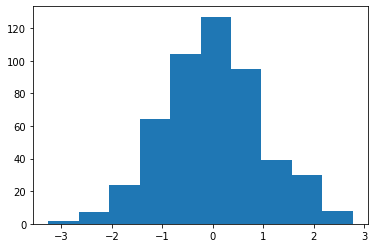

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,164.375846,45.775115,47.653525,21084.288806
1,139.366917,78.486886,4.342285,18289.969691
2,139.939107,89.469856,27.118533,18744.858525
3,188.083644,52.662991,40.671579,20906.796600
4,210.951541,75.948682,22.653866,19727.406104
...,...,...,...,...
495,179.159792,58.433771,48.035862,21459.822119
496,179.482215,26.740391,13.817482,19333.050260
497,141.828309,49.239069,20.118575,20834.357643
498,143.727533,55.970772,22.663131,18214.783515


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,164.375846,45.775115,47.653525,21084.288806
1,Female,Middle Class,139.366917,78.486886,4.342285,18289.969691
2,Female,Rich,139.939107,89.469856,27.118533,18744.858525
3,Female,Poor,188.083644,52.662991,40.671579,20906.796600
7,Male,Rich,203.331693,25.305577,42.383952,18117.877759
18,Male,Poor,138.412094,42.108667,53.384121,20709.828571


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
480,Female,Rich,188.257025,77.926057,32.812591,19444.480292
488,Female,Middle Class,172.411864,74.568377,34.613811,19194.545604
489,Female,Poor,179.374200,62.398798,28.320208,18828.201810
497,Male,Poor,141.828309,49.239069,20.118575,20834.357643
498,Male,Middle Class,143.727533,55.970772,22.663131,18214.783515
499,Male,Rich,116.450931,47.638761,38.133647,19570.307002


In [35]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     177.523575  78.404877  31.717056  21124.529424
       Poor             147.378328  92.485421  25.577290  21412.949566
       Rich             213.472350  86.171226  40.160546  20801.506283
Male   Middle Class     163.637630  69.099903  13.365850  18921.394030
       Poor             184.955938  30.343281  35.111259  19897.189696
       Rich             164.651543  77.975669  43.471748  18748.429110

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     163.072427  25.362034   7.397863  19192.270472
       Rich              88.033109  86.081465   6.285615  21017.857543
Male   Middle Class     143.727533  55.970772  22.663131  18214.783515
       Rich             147.825911  73.491706  26.491677  21481.054796

In [37]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
147,Female,Poor,193.890373,46.240277,-8.272540,20066.329055
128,Female,Rich,182.053056,83.662328,-3.706083,19511.421924
87,Male,Middle Class,145.933587,68.801459,-1.882857,20206.500288
294,Female,Middle Class,141.124261,104.658387,1.594104,19078.472054
141,Female,Poor,134.530791,74.466977,3.321144,18356.625683
69,Male,Middle Class,144.779861,22.369962,3.669763,18588.294767
1,Female,Middle Class,139.366917,78.486886,4.342285,18289.969691
61,Male,Rich,203.538934,57.431273,5.521301,19412.568849
79,Female,Poor,201.897202,41.441362,6.101503,18597.115254
457,Female,Rich,88.033109,86.081465,6.285615,21017.857543


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
147,Female,Poor,193.890373,46.240277,-8.272540,20066.329055
87,Male,Middle Class,145.933587,68.801459,-1.882857,20206.500288


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
468,Male,Rich,121.559851,63.110246,61.299618,18606.724951
265,Female,Middle Class,201.876208,125.949861,69.175410,20175.873353


# Conjunto de entrenamiento y conjunto de testing

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("/Users/josemanuelbustos/Desktop/cursos_udemy/python-ml-course-master/notebooks/datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
len(data)

3333

## Dividir utilizando la distribución normal

In [45]:
a = np.random.randn(len(data))

(array([ 13.,  68., 239., 583., 936., 864., 433., 142.,  48.,   7.]),
 array([-3.45511412, -2.74567718, -2.03624024, -1.3268033 , -0.61736636,
         0.09207058,  0.80150751,  1.51094445,  2.22038139,  2.92981833,
         3.63925527]),
 <a list of 10 Patch objects>)

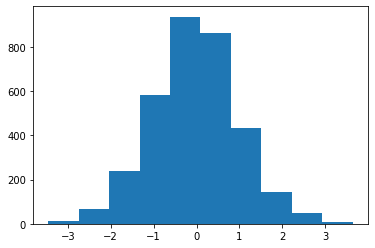

In [46]:
plt.hist(a)

In [47]:
check = (a<0.75)

In [48]:
check

array([False,  True,  True, ...,  True, False,  True])

In [52]:
training = data[check]
testing = data[~check]

In [53]:
len(training)

2651

In [54]:
len(testing)

682

## Con la libreria sklearn

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(data, test_size = 0.2)

In [58]:
len(train)

2666

In [59]:
len(test)

667

## Usando una función de shuffle

In [60]:
import numpy as np

In [61]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [62]:
import sklearn

In [63]:
data = sklearn.utils.shuffle(data)

In [64]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [65]:
len(train_data)

2499

In [66]:
len(test_data)

833